This is a little guide which show how with PIL library you can processing image. I hope you enjoy!

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image = Image.open('data/lena5.jpg')
image2 = Image.open('data/baboin.png')

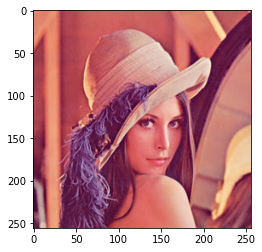

In [3]:
plt.imshow(image)

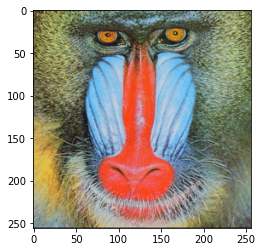

In [4]:
plt.imshow(image2)

In [5]:
print(image.size)
print(image.format)
print(image.mode)

(256, 256)
JPEG
RGB


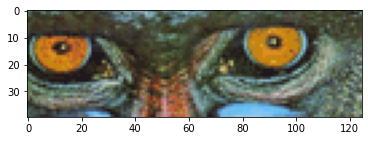

In [6]:
#Crop image
left = 75
top = 15
right = 200
bottom = 55
crop_image = image2.crop((left, top, right, bottom))
plt.imshow(crop_image)

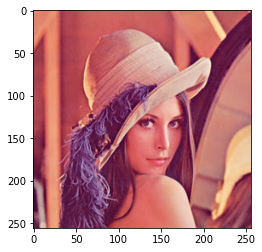

In [7]:
copied_image = image.copy()
plt.imshow(copied_image)

Text(0.5, 1.0, 'Flip Left Right image')

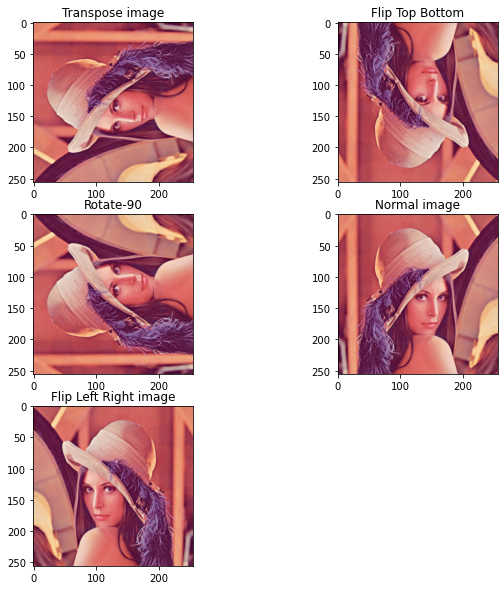

In [8]:
#Transposing images
transpose_image = image.transpose(Image.TRANSPOSE)
flip_top_bottom = image.transpose(Image.FLIP_TOP_BOTTOM)
flip_left_right = image.transpose(Image.FLIP_LEFT_RIGHT)
rotate_90 = image.transpose(Image.ROTATE_90)
# FIGURE SIZE
plt.figure(figsize=(10, 10))
#----------------------------
plt.subplot(3,2,4)
plt.imshow(image)
plt.title('Normal image')
#----------------------------
plt.subplot(3,2,1)
plt.imshow(transpose_image)
plt.title('Transpose image')
# ---------------------------
plt.subplot(3,2,2)
plt.imshow(flip_top_bottom)
plt.title('Flip Top Bottom')
#----------------------------
plt.subplot(3,2,3)
plt.imshow(rotate_90)
plt.title('Rotate-90')
#---------------------------
plt.subplot(3,2,5)
plt.imshow(flip_left_right)
plt.title('Flip Left Right image')

# INTERPLOATION TECHNIQUES
- NEAREST
- BOX
- BILINEAR
- HAMMING
- BICUBIC
- LANCZOS

Text(0.5, 1.0, 'Lanczos')

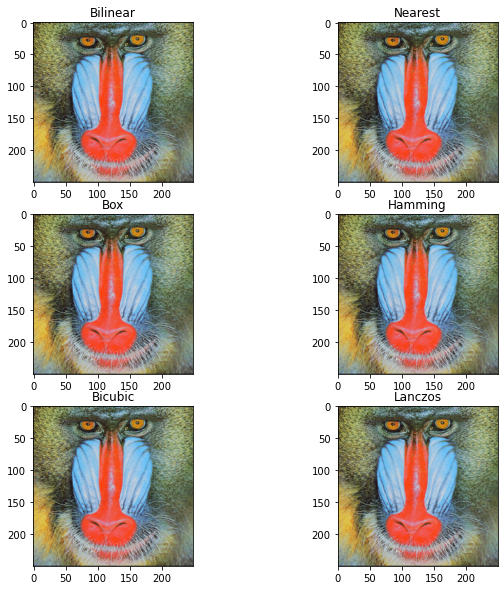

In [9]:
newsize = (250, 250)
plt.figure(figsize=(10,10))
bilinear = image2.resize(newsize, Image.BILINEAR)
nearest = image2.resize(newsize, Image.NEAREST)
box = image2.resize(newsize, Image.BOX)
hamming = image2.resize(newsize, Image.HAMMING)
bicubic = image2.resize(newsize, Image.BICUBIC)
lanczos = image2.resize(newsize, Image.LANCZOS)
#------------------
plt.subplot(3, 2, 1)
plt.imshow(bilinear)
plt.title('Bilinear')
#------------------
plt.subplot(3,2,2)
plt.imshow(nearest)
plt.title('Nearest')
#------------------
plt.subplot(3,2,3)
plt.imshow(box)
plt.title('Box')
#------------------
plt.subplot(3,2,4)
plt.imshow(hamming)
plt.title('Hamming')
#------------------
plt.subplot(3,2,5)
plt.imshow(bicubic)
plt.title('Bicubic')
#------------------
plt.subplot(3,2,6)
plt.imshow(lanczos)
plt.title('Lanczos')

# Rotating

- In this section you can rotate be any degree of angle
- This function accepts a angle parameter
- Returns the image object

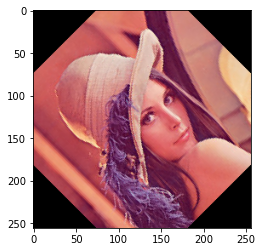

In [10]:
angle = 45
rotated_image = image.rotate(angle)
plt.imshow(rotated_image)

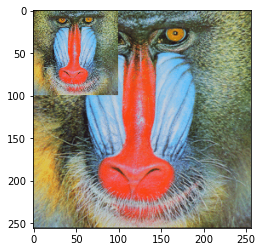

In [11]:
size = (100, 300)
crop_image = image2.copy()
crop_image.thumbnail(size) # preseves aspect ratio

copied_image = image2.copy()
copied_image.paste(crop_image, (0,0))
plt.imshow(copied_image)

# Convert to Black and White
We will use method from Image module that can convert image to black or white and this method accept one parameter.
For Black and White we just pass a string `'L'` to convert image to Black and White

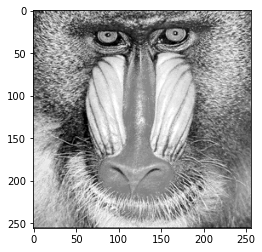

In [12]:
bw_image = image2.convert("L")
plt.imshow(bw_image, cmap = 'gray')#use cmap = gray for matplotlib to correctly show black and white

# Convert to Differents format
Here we use convert function for the converting image to another format, like HSV

In [13]:
new_form_image = image2.convert('HSV')
print(new_form_image.mode)

HSV


# Convert to NumPy format
We can convert image to `numpy.array` format and apply numpy functions. It takes image as input and returns a numpy array

In [14]:
np_arr = np.array(image)
print(np_arr.shape)

(256, 256, 3)


And also we can back convert array to image


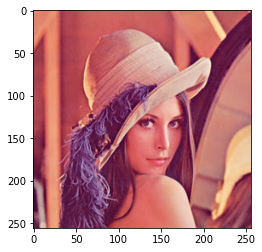

In [15]:
np_image = Image.fromarray(np_arr)
plt.imshow(np_image)

# Image Enhancement
Now, I'll show you few ways to image enhancement, like color enhancement, contrast and etc

Text(0.5, 1.0, 'Sharpness')

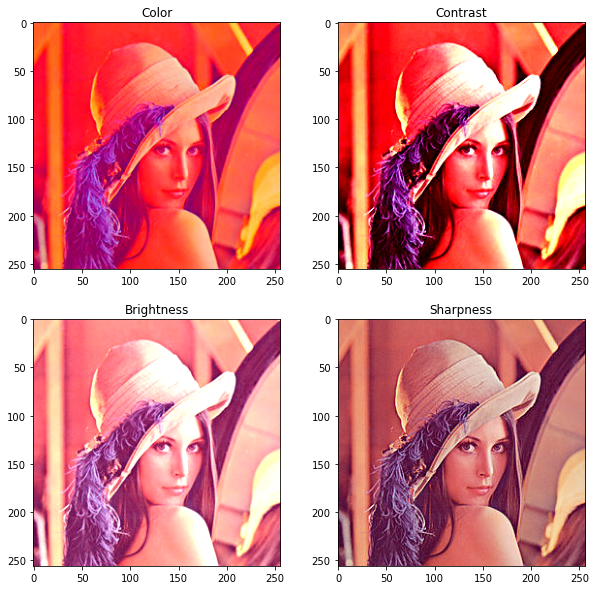

In [16]:
from PIL import ImageEnhance


image_color = image.copy()
image1 = ImageEnhance.Color(image_color).enhance(2.5)# default 1.0
image2 = ImageEnhance.Contrast(image_color).enhance(2.5)# default 1.0
image3 = ImageEnhance.Brightness(image_color).enhance(1.5)# default 1.0
image4 = ImageEnhance.Sharpness(image_color).enhance(2.5)# default 1.0


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title('Color')
#-----------------
plt.subplot(2,2,2)
plt.imshow(image2)
plt.title('Contrast')
#-----------------
plt.subplot(2,2,3)
plt.imshow(image3)
plt.title('Brightness')
#-----------------
plt.subplot(2,2,4)
plt.imshow(image4)
plt.title('Sharpness')

Text(0.5, 1.0, 'Sharpness')

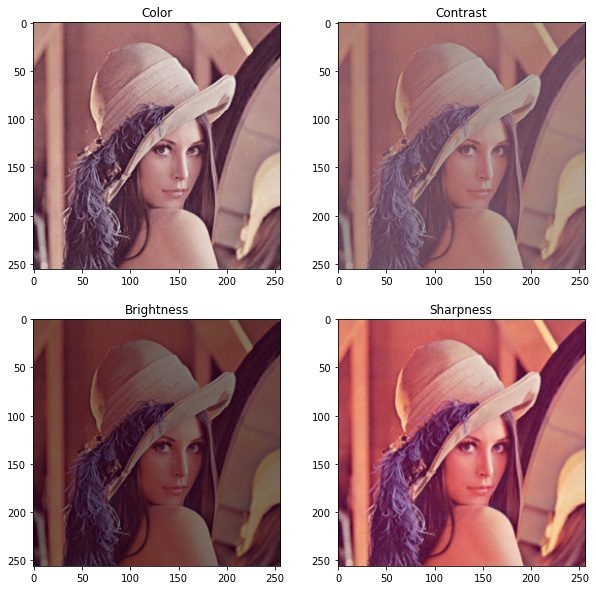

In [17]:
# LET'S REDUCE ENHANCEMENT

mage_color = image.copy()
image1 = ImageEnhance.Color(image_color).enhance(0.5)# default 1.0
image2 = ImageEnhance.Contrast(image_color).enhance(0.5)# default 1.0
image3 = ImageEnhance.Brightness(image_color).enhance(0.5)# default 1.0
image4 = ImageEnhance.Sharpness(image_color).enhance(0.5)# default 1.0


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title('Color')
#-----------------
plt.subplot(2,2,2)
plt.imshow(image2)
plt.title('Contrast')
#-----------------
plt.subplot(2,2,3)
plt.imshow(image3)
plt.title('Brightness')
#-----------------
plt.subplot(2,2,4)
plt.imshow(image4)
plt.title('Sharpness')

# Alpha Blending
Alpha Blending is the mixing two images

out = image1 * (1.0 - alpha) + image2 * alpha

Two rules in order to blend two images as follows:

- 1. Make sure that image have the same size
- 2. Make sure the images have the alpha channel (***.png format)

In [47]:
im = Image.open('data/index.jpg')
im1 = Image.open('data/index1.jpg')

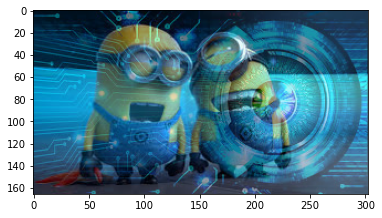

In [46]:
# making both images same size
im = im.resize(im1.size)

#blending
image_blend = Image.blend(im, im1, 0.4)
plt.imshow(image_blend)

I hope that you enjoyed  this guide and you got little more information about PIL image library